# Introduction

In this first seccion "Data Processing", I will perform the necessary cleaning to reduce the dimensionality and ambiguity of the text. In addition, I will conduct an exploratory analysis to understand how the text that I am going to model is structured. 


# Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importamos librerías que utilizaremos en el trabajo
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", 140)

In [3]:
#importamos NLTK
try:
    import nltk
    print("Package: 'nltk' is already installed and loaded successfully")
except ModuleNotFoundError:
    print("Package: 'nltk' is not installed, will be installed")
    !pip install nltk
    import nltk


Package: 'nltk' is already installed and loaded successfully


In [4]:
try:
    from PIL import Image
    print("Package: 'PIL' is already installed and loaded successfully")
except ModuleNotFoundError:
    print("Package: 'PIL' is not installed, will be installed")
    !pip install PIL
    from PIL import Image


Package: 'PIL' is already installed and loaded successfully


*   ***Load data***


The data used in this document are news items that were scraped from Pagina 12. For each news item, the title, subtitle, first paragraph and seccion to which it belongs were selected (the process used to do the scraping is detailed in the previous notebook.

In [5]:
df = pd.DataFrame()
directory = './data/'
for root,dirs,files in os.walk(directory):
    n_sections = len(files)
    for file in files:
       if file.endswith(".csv"):
           #Levantamos el csv con las notas por sección.
           df_ = pd.read_csv(directory + '/' + file)
           #Concatenamos todas las secciones.
           df = pd.concat([df_, df])

In [6]:
n_sections = n_sections -1

I check the number of notes extracted per seccion.

In [7]:
df_1=df['seccion'].value_counts()
df_1 =pd.DataFrame(df_1)
df_1


,seccion
Sociedad,693
Deportes,690
Ciencia,690
Economía,528
Cultura,528


Then, I visualize the name of the columns of the created dataset.

In [8]:
columns=df.columns
columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'titulo', 'subtitulo', 'primer_parrafo',
       'seccion', 'all_text'],
      dtype='object')

The cleaning process I carry out consists of removing everything from the text that does not provide information. The following are removed/cleaned: non-informative patterns (web page urls), punctuation marks, HTML tags, single characters and numbers. Whereas the process of tokenising a text consists of dividing the text into the minimum units of information. In the case of this study it will be in words.

In [9]:
#This function cleans and tokenises text into individual words.
def limpiar_tokenizar(texto):

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

In [10]:

df['primer_parrafo'] = df['primer_parrafo'].astype('str')
df['subtitulo'] = df['subtitulo'].astype('str')
df['titulo'] = df['titulo'].astype('str')

In [11]:
# Unimos las columnas de nuestro dataset
df['all_text'] = df['titulo']+ ' ' + df['subtitulo']+ ' ' +df['primer_parrafo'] 

In the next step I create a dataframe that will consist of two columns. The first column will be the note seccion and the second one will be the content of the note that the clean_tokenise function was applied to.

In [12]:
df_clean=pd.DataFrame()
df_clean['seccion']=df['seccion'].copy()
df_clean['texto_tokenizado'] = df['all_text'].apply(lambda x: limpiar_tokenizar(x))
df_clean.head()

,seccion,texto_tokenizado
0,Sociedad,"[suspenderán, las, licencias, de, conducir, de, quienes, dejen, manejar, sus, hijos, menores, drástica, medida, de, la, asnv, advirtió, ..."
1,Sociedad,"[inspirados, en, lali, espósito, su, amor, por, el, fernet, dos, empresas, lanzaron, el, “viajero”, para, tomar, el, aperitivo, ingenio,..."
2,Sociedad,"[qué, le, pasó, lucio, dupuy, cómo, fue, el, crimen, del, niño, de, años, en, la, pampa, la, madre, su, pareja, fueron, declaradas, culp..."
3,Sociedad,"[nuevo, billete, de, ¿quiénes, fueron, cecilia, grierson, ramón, carrillo, también, aparecerá, el, instituto, malbrán, en, el, reverso, ..."
4,Sociedad,"[efemérides, de, hoy, qué, pasó, un, de, febrero, hechos, que, ocurrieron, en, la, argentina, el, mundo, en, las, efemérides, del, de, f..."


## EDA

I began the exploratory analysis by studying the frequency of total and distinct words per seccion.

In [13]:
palabras = df_clean.explode(column='texto_tokenizado')

In [14]:
print('Different words per seccion')
print('----------------------------')
p_d = palabras.groupby(by='seccion')['texto_tokenizado'].nunique().reset_index()\
            .sort_values(by = 'texto_tokenizado', ascending = False).reset_index(drop=True)
p_d

Different words per seccion
----------------------------


,seccion,texto_tokenizado
0,Ciencia,5718
1,Cultura,5261
2,Sociedad,5080
3,Economía,3943
4,Deportes,3730


In [15]:
print('Top 5 most frequent words per section: ')
print('------------------------------------------------------------------------')
(
palabras.groupby(['seccion','texto_tokenizado'])['texto_tokenizado']
 .count()
 .reset_index(name='count')
 .groupby('seccion')
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

)

Top 5 most frequent words per section: 
------------------------------------------------------------------------


seccion texto_tokenizado  count
seccion                                         
Ciencia  1409    Ciencia               de   5193
         2991    Ciencia               la   3417
         1835    Ciencia               el   2289
         1891    Ciencia               en   2202
         4339    Ciencia              que   1797
Cultura  6972    Cultura               de   3708
         8487    Cultura               la   2321
         7315    Cultura               el   1863
         7371    Cultura               en   1630
         9740    Cultura              que   1067
Deportes 11851  Deportes               de   4044
         12112  Deportes               el   2694
         12919  Deportes               la   2547
         12161  Deportes               en   2025
         11908  Deportes              del   1248
Economía 15691  Economía               de   4235
         16826  Economía               la   2447
         15979  Economía               el   2201
         16024  Economía               en   1757
         17748  Economía              que   1175
Sociedad 19953  Sociedad               de   5991
         21373  Sociedad               la   3672
         20323  Sociedad               el   2574
         20373  Sociedad               en   2520
         22550  Sociedad              que   2013

As was expected in the previous table, it can be seen that the most frequent terms correspond to articles, prepositions, pronouns, in general, words that do not provide relevant information about the text. These words are known as **stopwords**. In the next section I will work on cleaning up these words.

## STOP WORDS

nltk package has the stopwords form most of the languages, so I get them from there.

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('spanish'))
print(stop_words[:20])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


These are the bar plots of the 10 most frequent words per section of the newspaper.

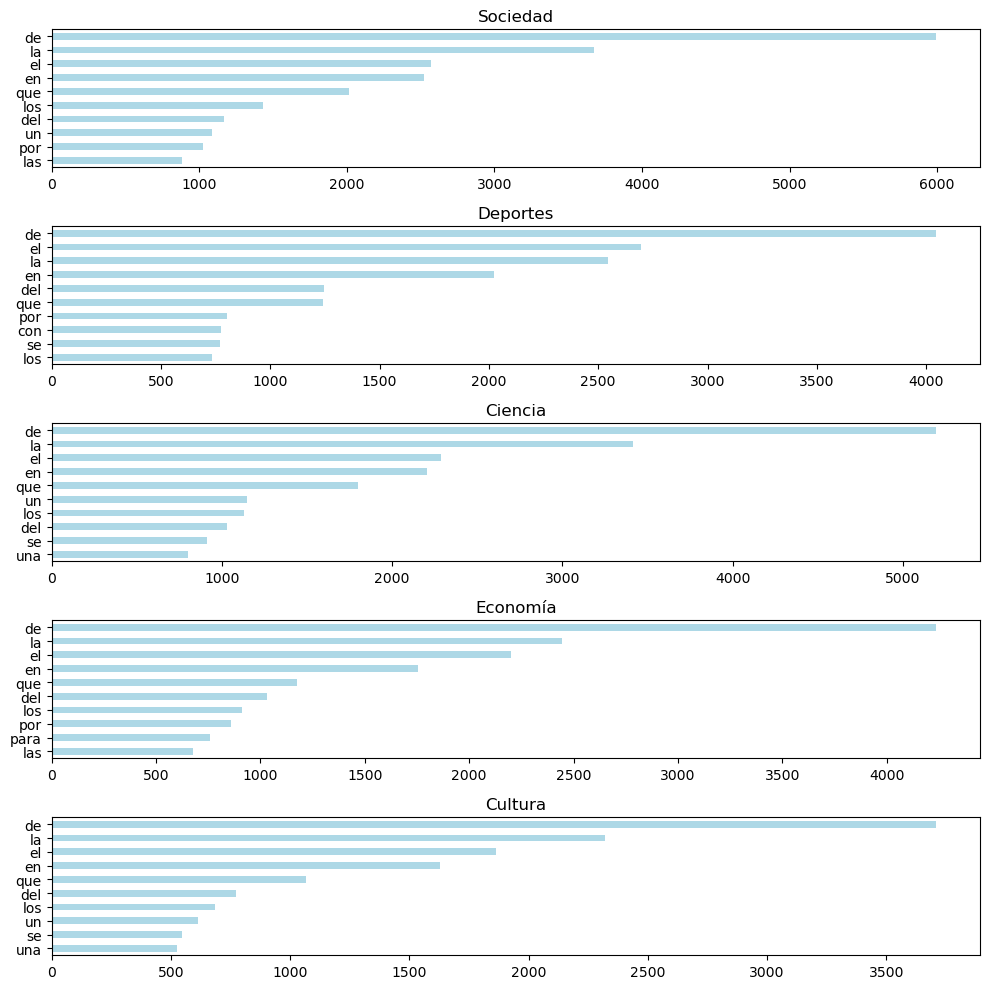

In [17]:
fig, axs = plt.subplots(nrows=n_sections, ncols=1,figsize=(10, n_sections * 2))
for i, seccion in enumerate(palabras.seccion.unique()):
    df_temp = palabras[palabras.seccion == seccion]
    counts  = df_temp['texto_tokenizado'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='lightblue', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(seccion)

fig.tight_layout()

Lets go back to the previous analysis, but without stopwords.

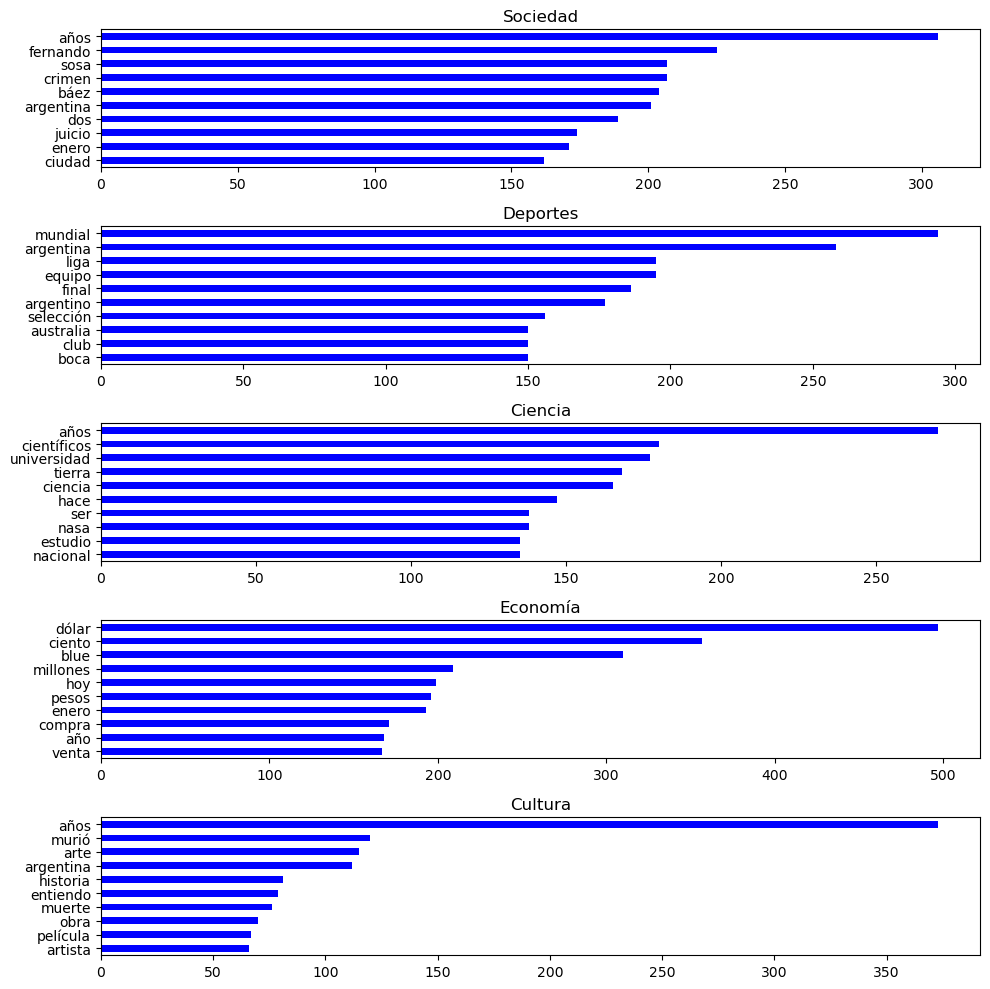

In [18]:
fig, axs = plt.subplots(nrows=n_sections, ncols=1,figsize=(10, n_sections *2))
for i, seccion in enumerate(palabras.seccion.unique()):
    df_temp = palabras[palabras.seccion == seccion]
    df_temp = df_temp[~df_temp['texto_tokenizado'].isin(stop_words)]
    counts  = df_temp['texto_tokenizado'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='blue', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(seccion)

fig.tight_layout()

- Society section: I can see some logical words like "ciudad" (city), "argentina" (Argentina), febrero (February). But also "sosa" and "fernando", which is the name of a boy who was murdered by a group of men outside a pub. This is a very sad thing that happened in Argentina a few years ago and the trial is going on these days, so everyone is talking about it.

- Economy section: it is reasonable that "dolar", "blue" (in Argentina there is a parallel quote for USDs), "ciento" (hundreds), pesos (local currency). This is what most of the newspaper articles are about.  

- Sports section: Here the words "liga" (league), "mundial" (world), final that mostly refer to the start of the local football league last week and Argentina winning the World Cup last year.

- Culture section: "años" (years), "arte" (art), "pelicula" (film), "cine" (cinema) are common in this section, and I suppose are also related to an Argentinian film nominated for an Oscar.

- Science section: "tierra" (world/land), "cientificos" (scientists), "unversidad" (university) are words that are logically related to this area.

## WordCloud of the sections


I make a word cloud which is a visual representation of the words that make up a text, where the size is larger for words that appear more frequently.

In [19]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

stopwords = set(stop_words)

deportes = palabras[(palabras.seccion =='Deportes')]
economia = palabras[(palabras.seccion =='Economía')]
cultura = palabras[(palabras.seccion =='Cultura')]
ciencia = palabras[(palabras.seccion =='Ciencia')]
sociedad = palabras[(palabras.seccion =='Sociedad')]

### Sports

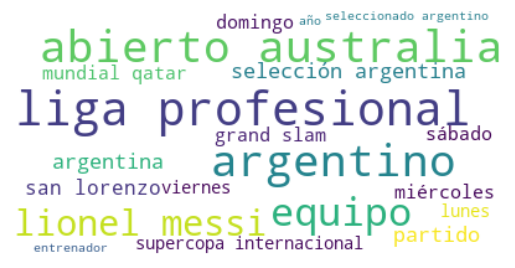

In [20]:
deportes= deportes['texto_tokenizado']
mylist2 = []
for thing in deportes:
    if thing not in stop_words:
        mylist2.append(thing)
l2 = [x for x in mylist2 if x not in stop_words]

unique_string_deporte=(" ").join(l2)

wordcloud = WordCloud(stopwords=stopwords, background_color='white',
        max_words=20).generate(unique_string_deporte)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Culture

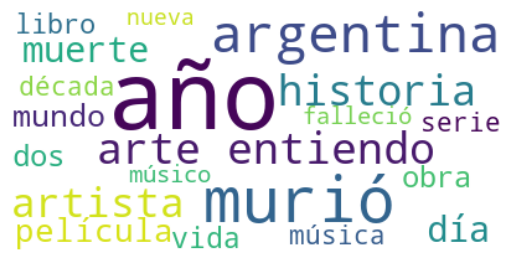

In [21]:
cultura= cultura['texto_tokenizado']
mylist3 = []
for thing in cultura:
    if thing not in stop_words:
        mylist3.append(thing)
l3 = [x for x in mylist3 if x not in stop_words]

unique_string_cultura=(" ").join(l3)

wordcloud = WordCloud(stopwords=stopwords, background_color='white',
        max_words=20).generate(unique_string_cultura)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Economy

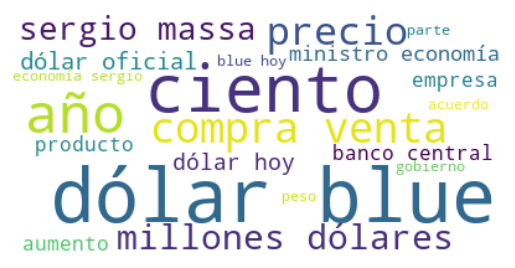

In [22]:
economia= economia['texto_tokenizado']
mylist4 = []
for thing in economia:
    if thing not in stop_words:
        mylist4.append(thing)
l4 = [x for x in mylist4 if x not in stop_words]

unique_string_economia=(" ").join(l4)

wordcloud = WordCloud(stopwords=stopwords, background_color='white',
        max_words=20).generate(unique_string_economia)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Science

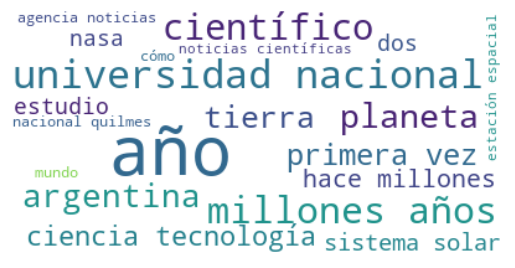

In [23]:
ciencia= ciencia['texto_tokenizado']
mylist5 = []
for thing in ciencia:
    if thing not in stop_words:
        mylist5.append(thing)
l5 = [x for x in mylist5 if x not in stop_words]

unique_string_ciencia=(" ").join(l5)

wordcloud = WordCloud(stopwords=stopwords, background_color='white',
        max_words=20).generate(unique_string_ciencia)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Society

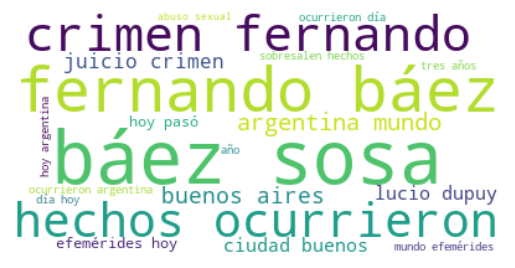

In [24]:
sociedad= sociedad['texto_tokenizado']
mylist6 = []
for thing in sociedad:
    if thing not in stop_words:
        mylist6.append(thing)
l6 = [x for x in mylist6 if x not in stop_words]

unique_string_sociedad=(" ").join(l6)

wordcloud = WordCloud(stopwords=stopwords, background_color='white',
        max_words=20).generate(unique_string_sociedad)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
df.to_csv('./data/df_cleaned.csv')